# Image Operations

In this notebook, I'm going to explore and show next Image operations:

### 1. Import and Load Images:

Loading JPG images from local machine using Glob and Path. Some useful glob operations are: 

* glob("/home/ach/*[0-9]*") search for list of  numbers
* glob("/home/ach/[a-c]*") search for letters 
* glob.glob("/home/ach/file?.txt") ? - means a single item if you search for question mark should include in [?]

### 2. Python Image Library:

Import images using ***Image.open*** from PIL library, ***asarry*** and ***fromarray***

### 3. OpenCV and Important functions:

* Import images using ***cv.imread*** 
* Create function to view images. All images would be opened in a separate window. ***cv.waitKey(0)*** and ***cv.destroyAllWindows()*** are important to prevent computer from freezing. To close the image, click on it and press any keyboard letter
* Image rotation with ***cv.getRotationMatrix2D()***
* Color change with ***cv.cvtColor(image, cv.COLOR_BGR2GRAY)***
* Black and white.Pixels below or darker 150 replaced to 0,above or brighter - to 255.***cv.threshold(image, 150, 255, 0)***
* Blur Images using ***cv.GaussianBlur(image, (odd_number, odd_number), 0)***
* Add text to images ***cv.putText()***
* Detecting faces with the ***CascadeClassifier***. Download here: https://github.com/opencv/opencv/tree/master/data/haarcascades 

Haar cascades, first introduced by Viola and Jones in their seminal 2001 publication, Rapid Object Detection using a Boosted Cascade of Simple Features, are arguably OpenCV’s most popular object detection algorithm. Other algorithms are (HOG + Linear SVM, SSDs, Faster R-CNN, YOLO, to name a few).
* Create a ***dataframe*** from images using OpenCV

### 4. Matplotlib

* Import images using ***mpimage.imread***
* Import Images using ***glob.glob()***
* Create a ***dataframe***



### 5. Preprocessing steps:
 - Read the picture files.
 - Decode the JPEG content to RBG grids of pixels.
 - Convert these into floating point tensors.
 - scale the pixel values (between 0 and 255) to the [0, 1] interval (neuralnets prefer to deal with small input values)
 - Reshape

### 6. Data Augmentation:

***Data Augmentation*** - powerful technique for mitigating overfitting in computer vision. The goal is that at training time, our model would never see the exact same picture twice. Below are meanings of each parameter:

-  ***rotation_range*** is a value in degrees (0-180), a range within which to randomly rotate pictures.
- ***width_shift*** and ***height_shift*** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- ***shear_range*** is for randomly applying shearing transformations.
- ***zoom_range*** is for randomly zooming inside pictures.
- ***horizontal_flip*** is for randomly flipping half of the images horizontally—relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
- ***fill_mode*** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

We can load images to augmentation using: ***flow()***, ***flow_from_directory()***, ***flow_from_dataset()***. Command generate batches of randomly transformed images. It will loop indefinitely and we need to `break` the loop at some point.

### 7. References

## Links to notebook:

* [Imports](#1.Imports)
* [Create path and load Images using Path and Glob](#2.Load-Images-using-Path-and-Glob)
* [Python Image Library](#3.PIL)
* [OpenCV](#4.OpenCV)
* [Matplotlib](#5.Matplotlib)
* [Preprocessing](#6.Preprocessing)
* [Import,Save and Augment Images using Image Generator](#7.Augmentation)
* [Conclusion](#8.Conclusion)
* [References](#9.References)

## 1.Imports

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import load_img, save_img, img_to_array,array_to_img, ImageDataGenerator, image

from PIL import Image

from glob import glob
# glob("/home/ach/*[0-9]*") search for list of  numbers
# glob("/home/ach/[a-c]*") search for letters 
# glob.glob("/home/ach/file?.txt") ? - means a single item if you search for question mark should include in [?]
#https://pythonworld.ru/moduli/modul-glob.html

from pathlib import Path

import cv2 as cv
# from cv2 import cv2

import matplotlib.image as mpimage

from keras.applications.vgg19 import VGG19

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install opencv-python

## 2.Load Images using Path and Glob

In [34]:
# Create a path where images located and use global() to select images

path = Path('./data/Best Artworks of All Time/resized/Andrei Rublev/')
lst = list(path.glob(r"*.jpg"))

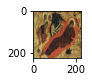

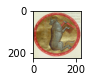

In [35]:
# Print images

for i in lst[:2]:
    plt.subplot(443)
    image = load_img(i, target_size=(224,224))
    plt.imshow(image)
    plt.show()

## 3.PIL 

In [156]:
#Load all data

from PIL import Image
from numpy import asarray

image1 = Image.open('./data/Andrei_Rublev_2.jpg')
print(image1.format)
print(image1.size)
print(image1.mode)

JPEG
(614, 391)
RGB


In [157]:
# Convert to array

data = asarray(image1)
print(type(data))

<class 'numpy.ndarray'>


In [158]:
# create Pillow image

PIL_image1 = Image.fromarray(data)
print(type(PIL_image1))

# summarize image details
print(PIL_image1.mode)
print(PIL_image1.size)

<class 'PIL.Image.Image'>
RGB
(614, 391)


## 4.OpenCV

In [30]:
# cv.imread reads images and converts them to numpy.ndarray of pixels
# reads string

image = cv.imread('./data/Andrei_Rublev_2.jpg')

In [31]:
# veiw images
# Opens images in separate window, if you want to stop viewing click on image and press any key

def viewImage(image, name_of_window):
    cv.namedWindow(name_of_window, cv.WINDOW_NORMAL)
    # rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) change colors from BGR to RGB
    cv.imshow(name_of_window, image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
viewImage(image,'Image')

In [17]:
# Rotate Images

(h, w, d) = image.shape
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, 90, 1.0)
rotated = cv.warpAffine(image, M, (w, h))
viewImage(rotated, 'Rotated Images')

In [23]:
# Gray
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # have to replace colors BGR to Gray
viewImage(gray_image, 'Grey Image')

In [19]:
# Black and white, all pixels below or darker 150 replaced to 0, and above or brighter - replace to 255
ret, threshold_image = cv.threshold(image, 150, 255, 0)
viewImage(threshold_image, 'Black and White')

In [26]:
# Blur
blurred = cv.GaussianBlur(image, (31, 31), 0) # should be two odd numbers 
viewImage(blurred, 'Blurred')

In [15]:
# text on images
# (image, text, org - position or coordinates(X,Y), font, fontScale, color(BlueGreenReed), thickness of the words in px.)
# Optional parameter are bottomLeftOrigin if it is True image would be in bottom left corner

cv.putText(image, 'this is Frida Kahlo', (30,450),cv.FONT_HERSHEY_SIMPLEX, 0.8, (30,100,250),2) 
viewImage(image, 'Text')

In [6]:
# Detecting faces with the CascadeClassifier
# https://github.com/opencv/opencv/tree/master/data/haarcascades 
    
DaliIm = cv.imread('./data/Salvador_Dali_121.jpg')
    
face_cascade=cv.CascadeClassifier('data/haarcascade_frontalface_default.xml')
 
faces = face_cascade.detectMultiScale(DaliIm,
                                     scaleFactor=1.1, minNeighbors=5)
print("Faced Detected:", len(faces)) 
    
for x,y,w,h in faces:
    cv.rectangle(DaliIm, (x,y), (x+w, y+h), (0,255,0),2)
    
cv.imshow("Face Detected", DaliIm)
 
cv.waitKey(0)
cv.destroyAllWindows() 

Faced Detected: 1


In [16]:
# Save edited images

# cv.imwrite("./data/Dali_Face.jpg", DaliIm)

True

In [170]:
# Load multiple images from local machine and save to dataframe

cv_images = [cv.imread(file) for file in glob('./data/Best Artworks of All Time/resized/Andrei Rublev/*.jpg')]
df = pd.DataFrame(cv_images, dtype='object')

## 5.Matplotlib

uint8
(391, 614, 3)


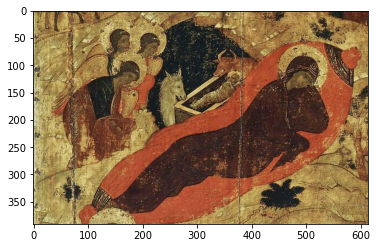

In [171]:
# Accepts string 
# Prints already nparray

image2 = mpimage.imread('./data/Best Artworks of All Time/resized/Andrei Rublev/Andrei_Rublev_1.jpg')

print(image2.dtype)
print(image2.shape)

plt.imshow(image2)
plt.show();

In [38]:
# Extract images to storage using glob.glob and create a dataframe
# Leave import globe in this cell since I have another imports of globe in this notebook
import glob

storage = []
for files in glob.glob('./data/Best Artworks of All Time/resized/Kazemir Malevich/*.jpg'):
    storage.append(mpimage.imread(files))

rublev = pd.DataFrame(storage)
rublev.head()

,0
0,"[[[164, 173, 216], [154, 163, 206], [151, 160,..."
1,"[[[114, 117, 98], [114, 117, 98], [116, 119, 1..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,"[[[229, 230, 216], [227, 228, 214], [228, 229,..."
4,"[[[234, 232, 233], [235, 233, 234], [239, 237,..."


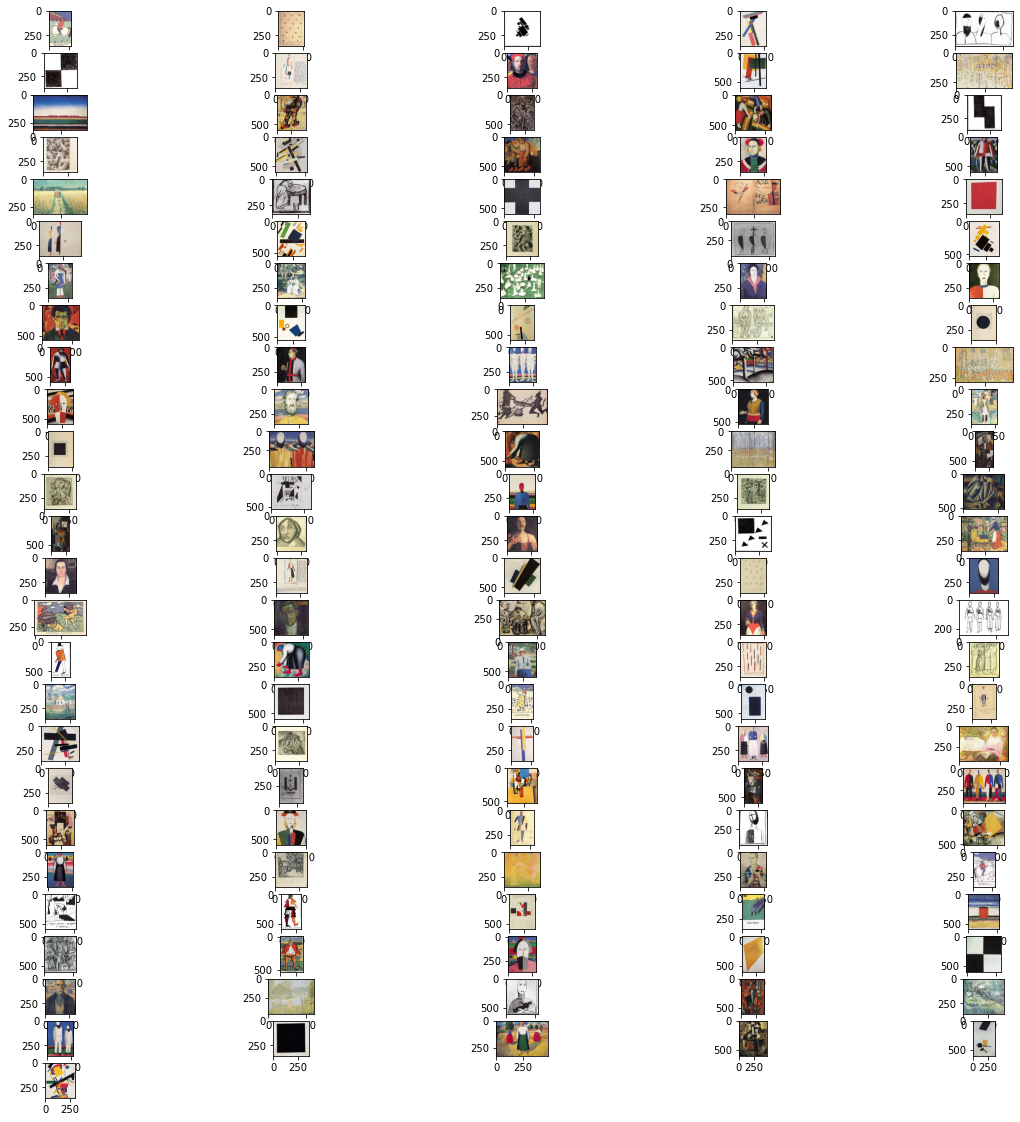

In [39]:
# Print images 

plt.figure(figsize=(20,20))
columns = 5
for num, file in enumerate(storage):
    plt.subplot(len(storage) / columns + 1, columns, num + 1)
    plt.imshow(file)

## 6.Preprocessing

In [174]:
# Import df with artists
info = pd.read_csv('./data/artists.csv')

# Sort artists by paintings
info = info.sort_values('paintings', ascending = False)
info.reset_index(drop = True, inplace = True)

In [175]:
# Create path to load images
from glob import glob

Dali = [cv.imread(file) for file in glob('./data/Best Artworks of All Time/resized/Salvador Dali/*.jpg')]

#Read image using OpenCV
DaliIm = cv.imread('./data/Salvador_Dali_121.jpg')

# Resize and scale 1 image
ready = cv.resize(DaliIm, (64,64)).astype('float32')/255

In [176]:
# Resize and prepare 139 images
width = 64
height = 64
imgs = np.array([cv.resize(img[0].astype('float32') / 255,(width,height)) for img in Dali])
imgs.shape

(139, 64, 64)

## 7.Augmentation

In [177]:
# Instantiate ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

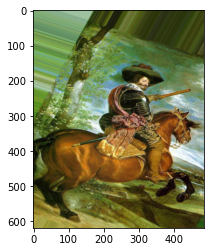

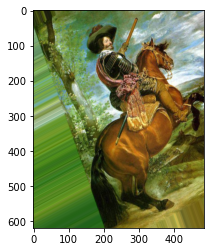

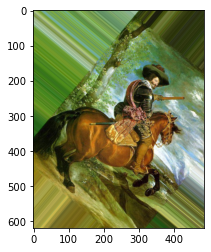

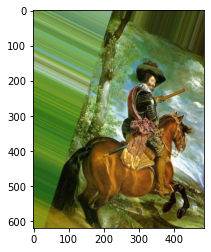

In [178]:
# Load image from local computer plus perform augmentation
from keras.preprocessing.image import image

img = load_img('./data/Best Artworks of All Time/resized/Diego Velazquez/Diego_Velazquez_103.jpg') # this is a PIL image
x = img_to_array(img)          # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [ ]:
# Augment and save to local machine in current notebook.
# Total of 3 images. Don't scale here to be able to look at the image
# Set the batch size equal to number of images

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/aug', save_prefix='Vrubel', save_format='jpg'):
    i += 1
    if i > 2:
        break 

## 8.Conclusion

Comparing different features, I've discovered that:
- ***Glob*** is more modern, mobile and useful technique than ***Path*** in importing images.
- ***OpenCV*** is more advanced library and has a lot of functions to manipulate with images.
- ***Matplotlib*** imshow() is super quick way to open and look at the image in your notebook.
- ***Matplotlib and OpenCV*** are good to convert images to dataframes.
- ***PIL*** would be my 3rd choice. It requires additional operations of converting PIL files to array and then to pixels.
- ***Augmentation*** is useful in reating a lot of new images and it would be used later as well.

## 9.References


* [Pluralsight](https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays) source for  importing Images to array
* [Display multiple images in one notebook's cell](https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell)
* [Path Imports](https://habr.com/ru/post/453862/) 
* [OpenCV Guide](https://tproger.ru/translations/opencv-python-guide/)
* [Glob for beginners](https://pythonworld.ru/moduli/modul-glob.html)
* [Haarcascades algorithms](https://github.com/opencv/opencv/tree/master/data/haarcascades)